In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -nc = 'https://raw.githubusercontent.com/naveen3par/Titanic_Kaggle/refs/heads/main/train.csv'
!wget -nc = 'https://raw.githubusercontent.com/naveen3par/Titanic_Kaggle/refs/heads/main/test.csv'

--2025-02-12 03:52:58--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-02-12 03:52:58--  https://raw.githubusercontent.com/naveen3par/Titanic_Kaggle/refs/heads/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2025-02-12 03:52:58 (4.52 MB/s) - ‘train.csv’ saved [61194/61194]

FINISHED --2025-02-12 03:52:58--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.01s (4.52 MB/s)
--2025-02-12 03:52:59--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-02-12 03:52:59--  https://raw.githubus

In [3]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [4]:
train_raw.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_raw.shape

(891, 12)

In [6]:
train_raw.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df_train = train_raw.drop(['Cabin'], axis=1)

In [13]:
mean_value_train = df_train['Age'].mean()
mean_value_train = round(mean_value_train)
df_train['Age'].fillna(mean_value_train, inplace=True)

<ipython-input-13-cd0ff4e30226>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(mean_value_train, inplace=True)


In [14]:
df_train = df_train.dropna(axis=0)

In [15]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Distribution of Classes on Titanic')

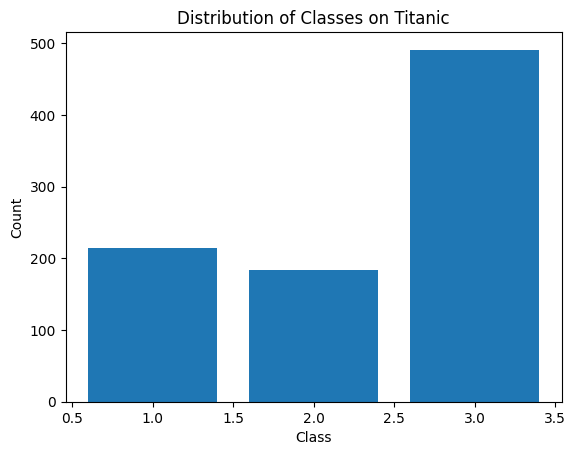

In [18]:
pclass_count = df_train['Pclass'].value_counts()

plt.bar(pclass_count.index, pclass_count.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes on Titanic')

Sex
male      577
female    312
Name: count, dtype: int64


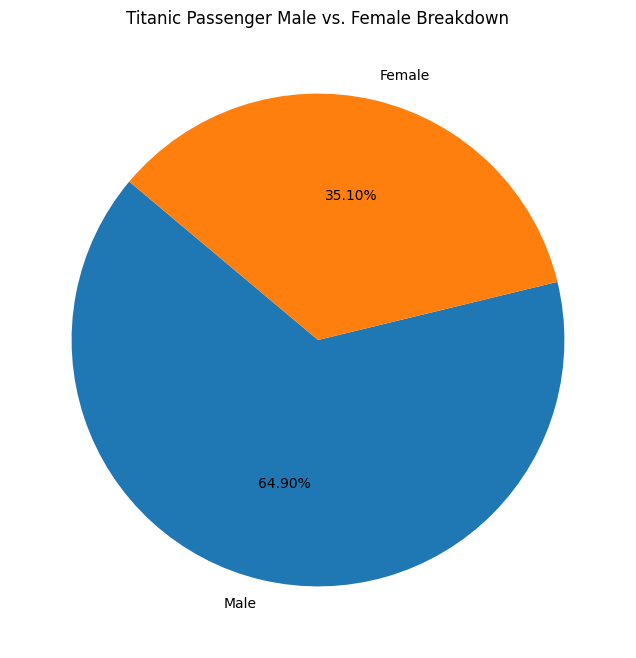

In [19]:
print(df_train['Sex'].value_counts())

fig, ax = plt.subplots(figsize=(14,8), dpi=100)

pie_chart_labels = ['Male', 'Female']

plt.title(label='Titanic Passenger Male vs. Female Breakdown')
plt.pie(df_train['Sex'].value_counts(), labels=pie_chart_labels, autopct='%1.2f%%', startangle = 140)

plt.show()

In [20]:
!wget -nc = 'https://raw.githubusercontent.com/naveen3par/Titanic_Kaggle/refs/heads/main/gender_submission.csv'

--2025-02-12 03:56:30--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-02-12 03:56:30--  https://raw.githubusercontent.com/naveen3par/Titanic_Kaggle/refs/heads/main/gender_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3258 (3.2K) [text/plain]
Saving to: ‘gender_submission.csv’

gender_submission.c 100%[===================>]   3.18K  --.-KB/s    in 0s      

2025-02-12 03:56:30 (38.4 MB/s) - ‘gender_submission.csv’ saved [3258/3258]

FINISHED --2025-02-12 03:56:30--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.2K in 0s (38.4 MB/s)


In [21]:
test_target_raw = pd.read_csv('gender_submission.csv')

In [22]:
test_raw = pd.merge(test_raw, test_target_raw, on='PassengerId')

In [23]:
test_raw.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [24]:
test_raw.shape

(418, 12)

In [25]:
test_raw.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [26]:
df_test = test_raw.drop(['Cabin'], axis=1)

In [27]:
mean_value_test = df_test['Age'].mean()
mean_value_test = round(mean_value_test)
df_test['Age'].fillna(mean_value_test, inplace=True)

<ipython-input-27-ce233474d3f6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(mean_value_test, inplace=True)


In [28]:
df_test = df_test.dropna(axis=0)

In [29]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [30]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
encoder_1 = OrdinalEncoder()
X = encoder_1.fit_transform(df_train[['Sex', 'Embarked']])

In [34]:
encoder_2 = OrdinalEncoder()
Y = encoder_2.fit_transform(df_test[['Sex', 'Embarked']])

In [35]:
X = pd.DataFrame(X, columns=['Sex', 'Embarked'])
Y = pd.DataFrame(Y, columns=['Sex', 'Embarked'])

In [36]:
df_train['Sex'] = X['Sex']
df_train['Embarked'] = X['Embarked']

df_test['Sex'] = Y['Sex']
df_test['Embarked'] = Y['Embarked']

In [37]:
df_train = df_train.head(-2)
df_test = df_test.head(-1)

In [42]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_col = ['Survived']

In [43]:
X_train = df_train[feature_cols]
y_train = df_train[target_col]

In [44]:
X_test = df_test[feature_cols]
y_test = df_test[target_col]

In [45]:
print(X_train)
print(y_train)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3  1.0  22.000000      1      0   7.2500       2.0
1         1  0.0  38.000000      1      0  71.2833       0.0
2         3  0.0  26.000000      0      0   7.9250       2.0
3         1  0.0  35.000000      1      0  53.1000       2.0
4         3  1.0  35.000000      0      0   8.0500       2.0
..      ...  ...        ...    ...    ...      ...       ...
884       3  1.0  25.000000      0      0   7.0500       2.0
885       3  0.0  39.000000      0      5  29.1250       2.0
886       2  0.0  27.000000      0      0  13.0000       2.0
887       1  1.0  19.000000      0      0  30.0000       0.0
888       3  1.0  29.699118      1      2  23.4500       1.0

[887 rows x 7 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
884         0
885         0
886         0
887         1
888         0

[887 rows x 1 columns]


In [46]:
print(X_test)
print(y_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3  1.0  34.5      0      0    7.8292       1.0
1         3  0.0  47.0      1      0    7.0000       2.0
2         2  1.0  62.0      0      0    9.6875       1.0
3         3  1.0  27.0      0      0    8.6625       2.0
4         3  0.0  22.0      1      1   12.2875       2.0
..      ...  ...   ...    ...    ...       ...       ...
412       3  1.0  28.0      0      0    7.7750       2.0
413       3  0.0  30.0      0      0    8.0500       0.0
414       1  1.0  39.0      0      0  108.9000       2.0
415       3  1.0  38.5      0      0    7.2500       2.0
416       3  1.0  30.0      0      0    8.0500       0.0

[416 rows x 7 columns]
     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
412         1
413         0
414         1
415         0
416         0

[416 rows x 1 columns]


In [47]:
X_train.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [48]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC Score: {auc_score:.2f}')

AUC-ROC Score: 0.58


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [54]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.63
Confusion Matrix:
[[203  61]
 [ 93  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.72       264
           1       0.49      0.39      0.43       152

    accuracy                           0.63       416
   macro avg       0.59      0.58      0.58       416
weighted avg       0.61      0.63      0.62       416



In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [57]:
rf_pred = rf_model.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, rf_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))

Accuracy: 0.6274
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       264
           1       0.49      0.51      0.50       152

    accuracy                           0.63       416
   macro avg       0.60      0.60      0.60       416
weighted avg       0.63      0.63      0.63       416

Confusion Matrix:
[[183  81]
 [ 74  78]]
